<a href="https://colab.research.google.com/github/rajeshree90/rmp123/blob/main/twitter%20sentiment%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')


In [3]:
from google.colab import files
uploaded = files.upload()

Saving twitter.csv to twitter (2).csv


Loading the dataset

In [4]:
df = pd.read_csv('twitter.csv')

In [5]:
df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [8]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


Preprocessing the dataset

In [6]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [9]:
df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [7]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [11]:
df.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","3rd #bihday to my amazing, hilarious #nephew..."


In [8]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your #acne #altwaystohe...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd #bihday to my amazing hilarious #nephew...


In [9]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#studiolife, #aislife, #requires, #passion, #...
1    [#white, #supremacists, want, everyone, to, se...
2    [safe, ways, to, heal, your, #acne, #altwaysto...
3    [is, the, hp, and, the, cursed, child, book, u...
4    [rd, #bihday, to, my, amazing, hilarious, #nep...
Name: clean_tweet, dtype: object

In [10]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [#studiolif, #aislif, #requir, #passion, #dedi...
1    [#white, #supremacist, want, everyon, to, see,...
2    [safe, way, to, heal, your, #acn, #altwaystoh,...
3    [is, the, hp, and, the, curs, child, book, up,...
4    [rd, #bihday, to, my, amaz, hilari, #nephew, e...
Name: clean_tweet, dtype: object

In [11]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolif #aislif #requir #passion #dedic #wi...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacist want everyon to see the ne...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way to heal your #acn #altwaystoh #health...
3,31966,is the hp and the cursed child book up for res...,is the hp and the curs child book up for reser...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd #bihday to my amaz hilari #nephew eli ahmir...


Exploratory Data Analysis

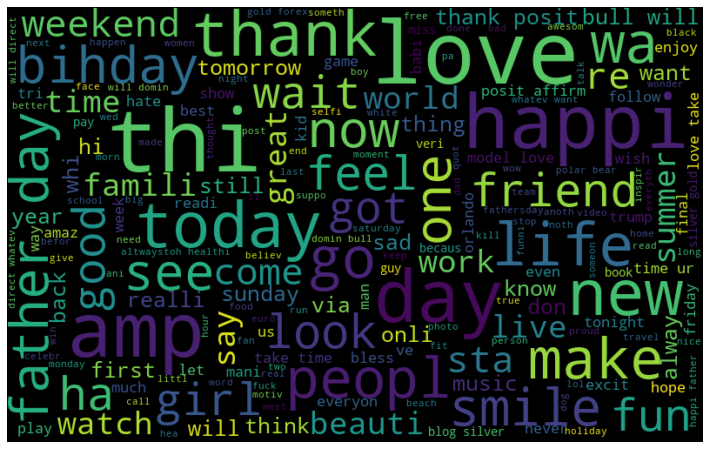

In [12]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    

In [14]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'])

In [18]:
ht_positive[:5]

[['studiolif', 'aislif', 'requir', 'passion', 'dedic', 'willpow', 'newmateri'],
 ['white', 'supremacist', 'bird', 'movi'],
 ['acn', 'altwaystoh', 'healthi', 'heal'],
 ['harrypott', 'pottermor', 'favorit'],
 ['bihday', 'nephew']]

In [15]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [16]:
ht_positive[:5]

['studiolif', 'aislif', 'requir', 'passion', 'dedic']

In [17]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,studiolif,2
1,aislif,1
2,requir,1
3,passion,17
4,dedic,3


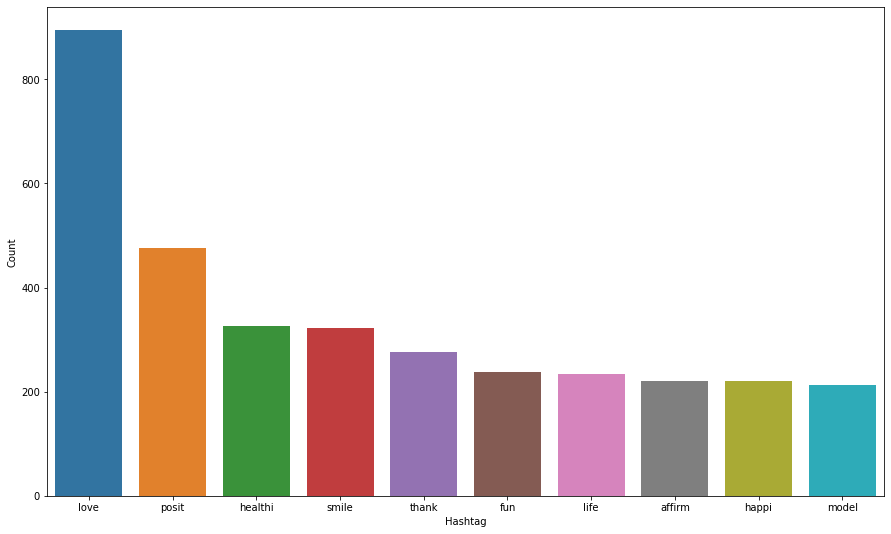

In [22]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

Input Split

In [18]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,studiolif,2
1,aislif,1
2,requir,1
3,passion,17
4,dedic,3


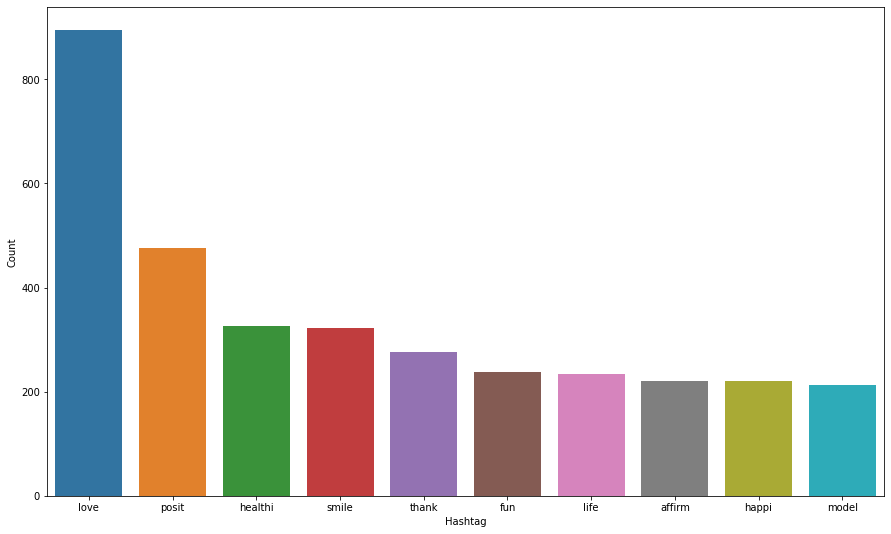

In [55]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [19]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow,df['id'], random_state=4, test_size=0.3)

Model Training

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [22]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [60]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred,pos_label='positive',average='micro')

0.6

In [61]:
accuracy_score(y_test,pred)

0.6

In [62]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred,pos_label='positive',average='macro')

0.0

In [63]:
accuracy_score(y_test,pred)

0.0

In [64]:
pred_prob[0][1] >= 0.3

False